In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.linear_model import LinearRegression

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [2]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
train = pd.read_csv('C:/Users/616911/Documents/Class 422/Module2/train.csv')
test = pd.read_csv('C:/Users/616911/Documents/Class 422/Module2/test.csv')

## EDA on Data File

In [4]:
print("train shape info {shap}\n".format(shap=train.shape))
print("test shape info {shap}\n".format(shap=test.shape))

train shape info (1460, 81)

test shape info (1459, 80)



In [5]:
train.isnull().sum().sort_values()

Id                  0
TotalBsmtSF         0
Heating             0
SaleCondition       0
CentralAir          0
                 ... 
FireplaceQu       690
Fence            1179
Alley            1369
MiscFeature      1406
PoolQC           1453
Length: 81, dtype: int64

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [8]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [105]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Data Visualizations

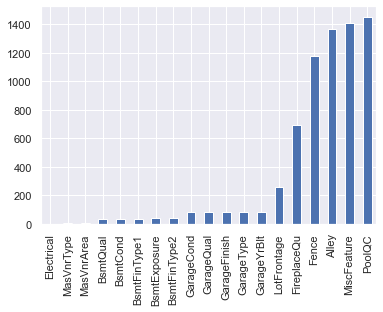

In [9]:
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar();

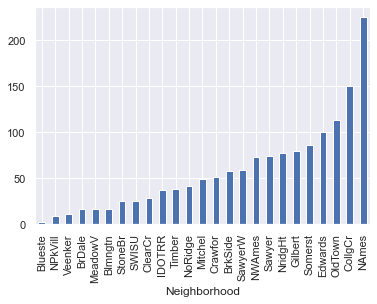

In [10]:
train.groupby('Neighborhood').SalePrice.count().sort_values().plot(kind='bar');

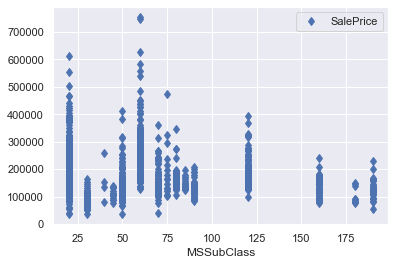

In [108]:
train.plot(x='MSSubClass', y='SalePrice', style = 'd');

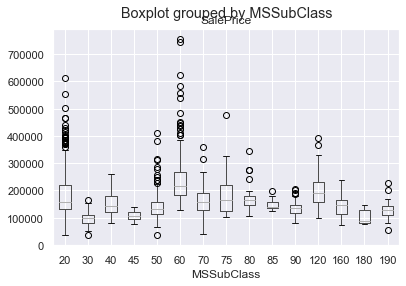

In [11]:
train.boxplot(column=['SalePrice'], by='MSSubClass');

# Features Selection

In [16]:
housing_values = train.describe().columns
# Reviewed the numeric values and their impact on SP.

In [17]:
features_selected = train[housing_values].corr()['SalePrice'].sort_values(ascending=False)[1:10].index
features_selected = list(features_selected)
features_selected
# My selection of features that have a higher correlation with SalesPrice.

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt']

Correlated Values Effecting Sales Price. 
Create a heat map to make sure they reflect the information.

<AxesSubplot:>

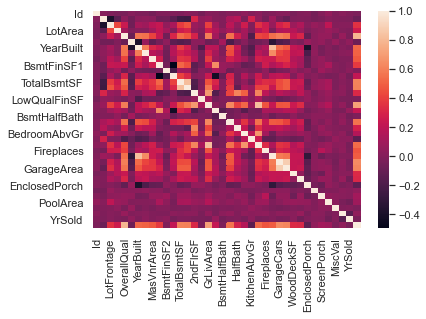

In [18]:
# visual representation of correlation of features with saleprice.
sns.heatmap(train[housing_values].corr())

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


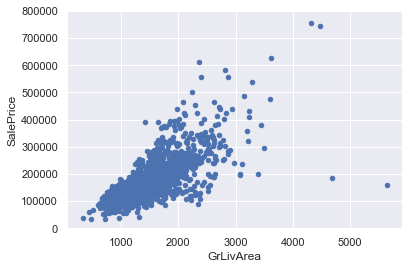

In [19]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


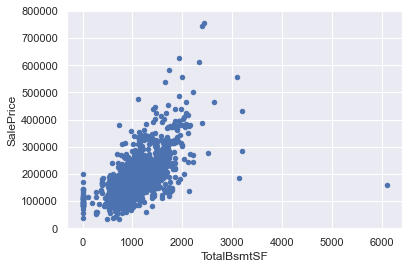

In [36]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

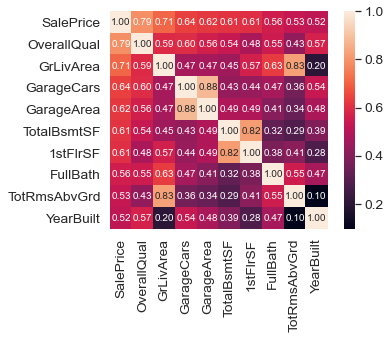

In [114]:
#correlation matrix
corrmat = train.corr()
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Sorting and Cleaning Up Training Data
1. Removing columns values with too many null values
2. Further visualizations to ensure our features are correct
3. Move on to Model Application 

In [20]:
train.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [72]:
#missing = train.isnull().sum().to_frame()
#missing = missing[0].sort_values(ascending=False).head(10).to_frame()
#missing[0] = missing[0].apply(lambda x : x/1460)
#missing\


In [21]:
#Deleting columns with too many missing values and low connection to sales price
train=train.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage','GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 
                  'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType', 'MasVnrArea', 'Electrical'])
test=test.drop(columns=[ 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage','GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 
                  'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType', 'MasVnrArea', 'Electrical'])

In [22]:
#Confirm there are no null values in the data to reduce modeling error
train.isnull().values.any()

False

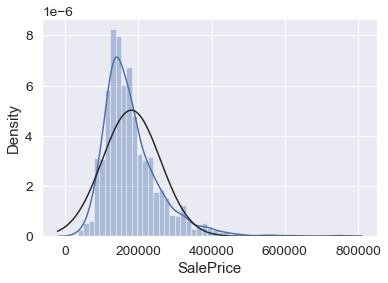

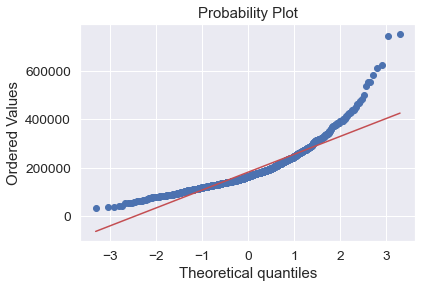

In [120]:
#histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt);
#Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

In [77]:
#applying log transformation
train['SalePrice'] = np.log(train['SalePrice'])

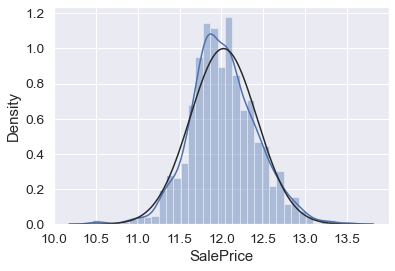

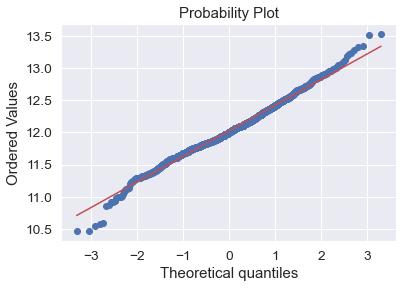

In [79]:
#transformed histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

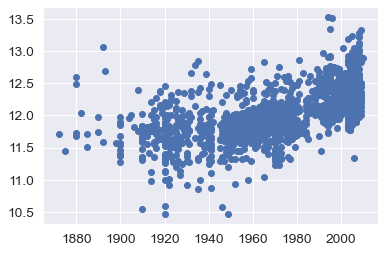

In [86]:
#YearBuilt vs SalePrice
plt.scatter(x=train['YearBuilt'], y=train["SalePrice"]);

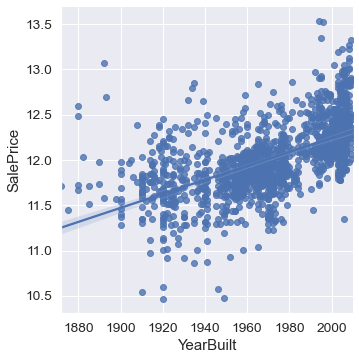

In [91]:
# if we want to do a regression we want to make sure that our Y is a continous number
sns.lmplot(x='YearBuilt', y='SalePrice', data=train);

## Model Application on Training Set Data
1. Logistics Regession
2. KNN Regression
3. Random Forest Regression

In [111]:
# Baseline
X = train[features_selected]
y = train.SalePrice
X.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,7,1710,2,548,856,856,2,8,2003
1,6,1262,2,460,1262,1262,2,6,1976
2,7,1786,2,608,920,920,2,6,2001
3,7,1717,3,642,756,961,1,7,1915
4,8,2198,3,836,1145,1145,2,9,2000


In [112]:
# model the data, use a cross validation technique as well
model = LinearRegression(normalize=True)

#split data into a training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y)


In [113]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1095, 9), (1095,), (365, 9), (365,))

In [114]:
#Use the model to predict

model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["LinearR", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 25890.896661562023
MSE: 1409391123.7141638
RMSE: 37541.85828797189
R2 Square 0.7946229773614016
__________________________________
Train set evaluation:
_____________________________________
MAE: 23914.945144497953
MSE: 1478904196.9958766
RMSE: 38456.52346476312
R2 Square 0.7582767417027964
__________________________________


In [62]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
OverallQual,21577.411683
GrLivArea,48.974789
GarageCars,15361.390909
GarageArea,1.788554
TotalBsmtSF,20.302330
1stFlrSF,10.187512
FullBath,-2154.362450
TotRmsAbvGrd,158.351275
YearBuilt,286.211579


The results indicate that the test and training scores are pretty close. Linear regression underfits most of the time as represented in this case. The margin is not very high. 

In [80]:
model = KNeighborsRegressor(n_neighbors=50)
#model.fit(X_train, y_train)

#y_pred_class = model.predict(X_test)
#print(metrics.accuracy_score(y_test, y_pred_class))

#print('TRAIN Accuracy:', knn.score(X_train, y_train))  # The model is overfitting. Training > Testing. 
#print('TEST  Accuracy:', knn.score(X_test, y_test)) # We get 1.3% correct when we use this model on testing data
# Its memorizing the training data and not applying to other models. 
# Get the accuracy score
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["KNN", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 29121.64410958904
MSE: 1922120953.628032
RMSE: 43841.99988171196
R2 Square 0.6944876962799352
__________________________________
Train set evaluation:
_____________________________________
MAE: 27198.986301369863
MSE: 1886728452.480112
RMSE: 43436.48757070617
R2 Square 0.7006909853363824
__________________________________


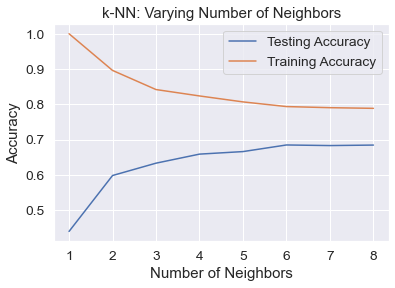

In [237]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, n_neighbor in enumerate(neighbors):
    
    # Setup a k-NN Classifier with n_neighbor
    knn = KNeighborsRegressor(n_neighbors=n_neighbor)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.savefig("knn", facecolor='w')

In [31]:
forest_model = RandomForestRegressor(n_estimators=200, max_depth=10)
forest_model.fit(X_train, y_train)
predicted_random_forest = forest_model.predict(X_test)
forest_model.score(X_train,y_train)
print('RMSE:', mean_squared_error(np.log(y_test), np.log(predicted_random_forest),squared=False))

RMSE: 0.1668151037219686


In [81]:
print('TRAIN Accuracy:', forest_model.score(X_train, y_train))  # The model is overfitting. Training > Testing. 
print('TEST  Accuracy:', forest_model.score(X_test, y_test)) # We get 1.3% correct when we use this model on testing data
# Its memorizing the training data and not applying to other models. 
# Get the accuracy score
model = RandomForestRegressor(n_estimators=200, max_depth=10)

model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["RandomFRegressor", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

TRAIN Accuracy: 0.9406919390536981
TEST  Accuracy: 0.9521826692959543
Test set evaluation:
_____________________________________
MAE: 20246.915355715297
MSE: 898331541.1132073
RMSE: 29972.1794521721
R2 Square 0.8572143245658599
__________________________________
Train set evaluation:
_____________________________________
MAE: 9882.577705091613
MSE: 209918215.20875645
RMSE: 14488.554628007461
R2 Square 0.9666987509137909
__________________________________


LinearRegression appears to be the best at predicting the sales prices based on the variables we selected.

In [74]:
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square


results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

In [82]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 24222.986659664606
MSE: 1304216731.0395834
RMSE: 36113.94095137754
R2 Square 0.7927007364973224
__________________________________
Train set evaluation:
_____________________________________
MAE: 24036.828575471085
MSE: 1508839742.9598522
RMSE: 38843.786413786336
R2 Square 0.7606389323503459
__________________________________


In [83]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 24596.665717575383
MSE: 1314207253.058699
RMSE: 36251.99653893147
R2 Square 0.7911127888753662
__________________________________
Train set evaluation:
_____________________________________
MAE: 24512.575669676255
MSE: 1506505744.4625351
RMSE: 38813.73139061143
R2 Square 0.7610091959086973
__________________________________


In [84]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 24487.30008138468
MSE: 1312982306.7814155
RMSE: 36235.09772004783
R2 Square 0.7913074884640678
__________________________________
Train set evaluation:
_____________________________________
MAE: 24320.976398282688
MSE: 1501257326.4025974
RMSE: 38746.062076069065
R2 Square 0.761841800534974
__________________________________


In [100]:
results_df['R2 Square'].sort_values(ascending=False)
results_df

,MAE,MSE,RMSE,R2 Square,Cross Validation
Model,,,,,
NaN,24222.986660,1.304217e+09,36113.940951,0.792701,0.764045
NaN,19894.193885,8.842537e+08,29736.403543,0.859452,0.764047
NaN,29121.644110,1.922121e+09,43841.999882,0.694488,0.764047
NaN,29121.644110,1.922121e+09,43841.999882,0.694488,0.764047
LinearR,29121.644110,1.922121e+09,43841.999882,0.694488,0.764047
KNN,29121.644110,1.922121e+09,43841.999882,0.694488,0.764047
RandomFRegressor,20246.915356,8.983315e+08,29972.179452,0.857214,0.764047
Ridge Regression,24222.986660,1.304217e+09,36113.940951,0.792701,0.764075
Lasso Regression,24596.665718,1.314207e+09,36251.996539,0.791113,0.764047


<AxesSubplot:ylabel='Model'>

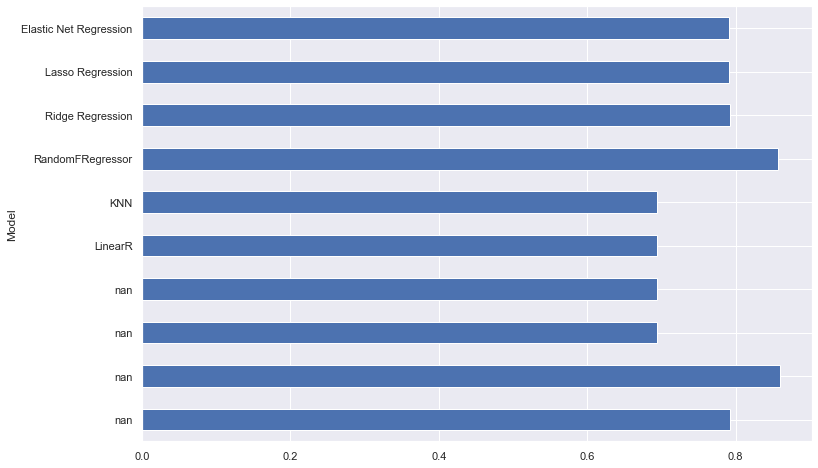

In [85]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

# Applying Model to Test Data
1. Find null values and fill them
2. Select features similar to training data
3. Create submission file

In [107]:
#test.info()
test.isnull().sum().sort_values(ascending=False)[1:20]

Id              0
Fireplaces      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
GarageCars      0
HeatingQC       0
GarageArea      0
PavedDrive      0
dtype: int64

In [91]:
#replace missing data
test['Functional'].fillna(0, inplace = True)
test['BsmtFullBath'].fillna(0, inplace = True)
test['Utilities'].fillna(0, inplace = True)
test['BsmtHalfBath'].fillna(0, inplace = True)
test['BsmtFinSF1'].fillna(0, inplace = True)
test['BsmtFinSF2'].fillna(0, inplace = True)
test['Exterior2nd'].fillna(0, inplace = True)
test['GarageCars'].fillna(0, inplace = True)
test['GarageArea'].fillna(0, inplace = True)
test['Exterior1st'].fillna(0, inplace = True)
test['KitchenQual'].fillna(0, inplace = True)
test['BsmtUnfSF'].fillna(0, inplace = True)
test['TotalBsmtSF'].fillna(0, inplace = True)
test['SaleType'].fillna(0, inplace = True)

In [92]:
test_ids = test.Id

In [93]:
# Define features: 
features_selected2 = ['OverallQual','GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
#features_selected

In [103]:
Xtest2 = test[features_selected2]
#RandomF = RandomForestRegressor(n_estimators=200, max_depth=10)


In [115]:
preds = lr.predict(Xtest2)

In [116]:
submission = pd.concat([test_ids, pd.Series(preds, name='SalePrice')], axis=1)
submission

,Id,SalePrice
0,1461,107822.425131
1,1462,162644.355990
2,1463,168206.288566
3,1464,188921.451038
4,1465,225032.262686
...,...,...
1454,2915,71365.729106
1455,2916,87396.997657
1456,2917,149287.501518
1457,2918,105173.380403


In [117]:
submission.to_csv('C:/Users/616911/Documents/Class 422/Module2/submission2.csv', index=False, header=True)